# Визуализация

### Необходимые действия для того, чтобы привести даные из файла csv в божеский вид:

In [5]:
import pandas as pd

C:\Users\79168\AppData\Local\Temp\ipykernel_31228\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
def fixer(line):
    to_replace = ['\n', '"', '₽']
    for item in to_replace:
        line = line.replace(item, '')
    line = line.split(',')
    for i in [1, 4, 5, 6]:
        line[i] = line[i].strip()
    line[3] = line[3].split("\xa0")[0]
    if len(line) == 8:
        return(line)

In [7]:
bad_data = []
data = []
with open('data_for_bikes.csv', 'r', encoding = 'UTF-8') as infile:
    file = infile.readlines()
    for line in file:
        try:
            ans = fixer(line)
            if ans != None:
                data.append(fixer(line))
            else:
                bad_data.append(line)
        except:
            bad_data.append(line)

In [8]:
col = ['Модель', 'Год', 'Цена', 'Объем двигателя (куб.см.)', 'Состояние', 'Наличие ПТС', 'Наличие Пробега', 'Город']
data = pd.DataFrame(data, columns = col)

In [9]:
data.head(10)

,Модель,Год,Цена,Объем двигателя (куб.см.),Состояние,Наличие ПТС,Наличие Пробега,Город
0,BMW K 1600 GT,2014,1 365 000,1 600,исправен,птс,без пробега,Владивосток
1,Big Dog,2007,1 550 000,2 293,исправен,птс,без пробега,Владивосток
2,Kawasaki Z 1000,2008,600 000,1 000,исправен,птс,с пробегом,Владивосток
3,Motoland TT250,2024,176 000,250,исправен,без птс,без пробега,Владивосток
4,Zuumav K7 300,2024,310 000,300,исправен,без птс,без пробега,Владивосток
5,Yamaha R1 Electro / Видео,2024,380 000,5 000,исправен,без птс,без пробега,Владивосток
6,Zuumav K1R 110 kids R10,2024,85 000,110,исправен,без птс,без пробега,Владивосток
7,Sharmax Power Max 250,2024,234 900,250,исправен,без птс,без пробега,Владивосток
8,Honda X4,2000,430 000,1 300,исправен,птс,с пробегом,Владивосток
9,Wels Thunder 125 17/14,2024,105 000,125,исправен,без птс,без пробега,Владивосток


---

### Небольшие махинации со столбцами:

Приведём столбцы Год, Цена и Объем двигателя к числовому формату

In [10]:
data['Год'] = data['Год'].astype(int)

In [ ]:
for i in range(len(data['Цена'])):
    data['Цена'][i] = data['Цена'][i].replace(" ", "")

In [12]:
data['Цена'] = data['Цена'].astype(int)

In [ ]:
for i in range(len(data['Объем двигателя (куб.см.)'])):
    data['Объем двигателя (куб.см.)'][i] = data['Объем двигателя (куб.см.)'][i].replace(" ", "")

data['Объем двигателя (куб.см.)'] = data['Объем двигателя (куб.см.)'].astype(int)

---

Импортируем всякого интересного:

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

---

### Полетели делать визуал:

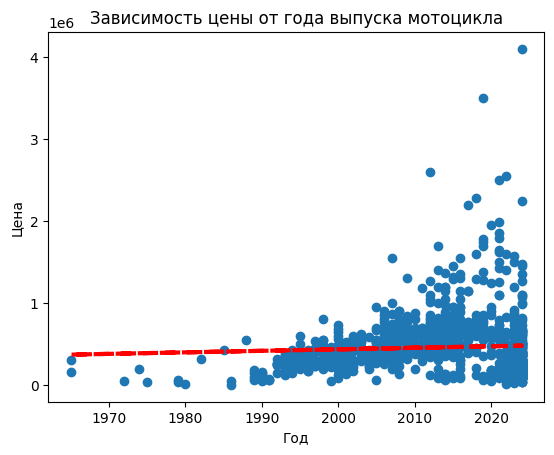

In [15]:
plt.scatter(data['Год'], data['Цена'])
z = np.polyfit(data['Год'], data['Цена'], 1 )
p = np.poly1d(z)
plt.plot(data['Год'], p(data['Год']), color="red", linewidth= 3 , linestyle="--")

plt.title('Зависимость цены от года выпуска мотоцикла')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

Вывод: чем новее мотоцикл, тем он дороже

---

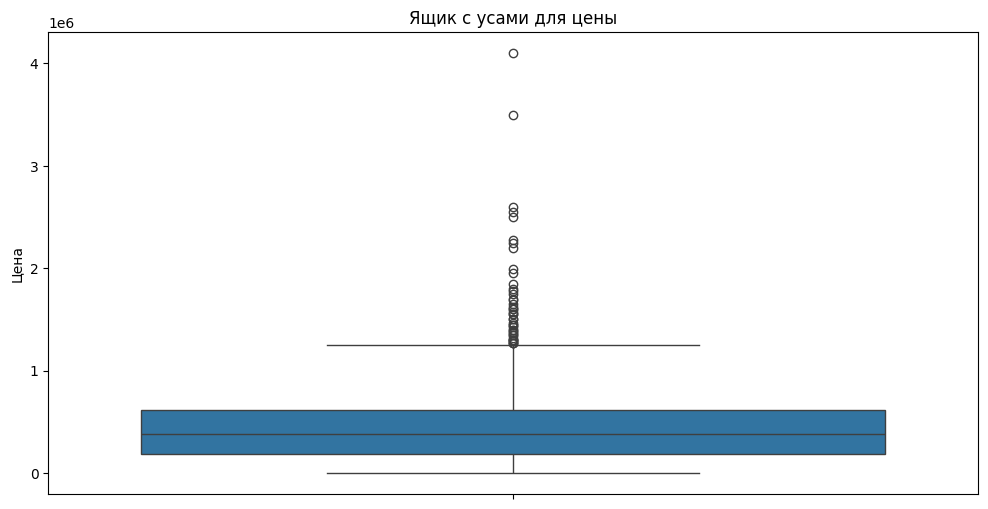

In [16]:
sns.boxplot(data["Цена"])  # сначала построим ящик с усами для пробега автомобиля
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.title('Ящик с усами для цены')
plt.show();

Вывод: В основном все цены сосредоточенны на одном уровне, однако среди данных присутствуют сильные выбросы.

---

C:\Users\79168\AppData\Local\Temp\ipykernel_28968\703175406.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Наличие Пробега', y ='Цена', data = data, palette ='plasma', estimator = np.std)


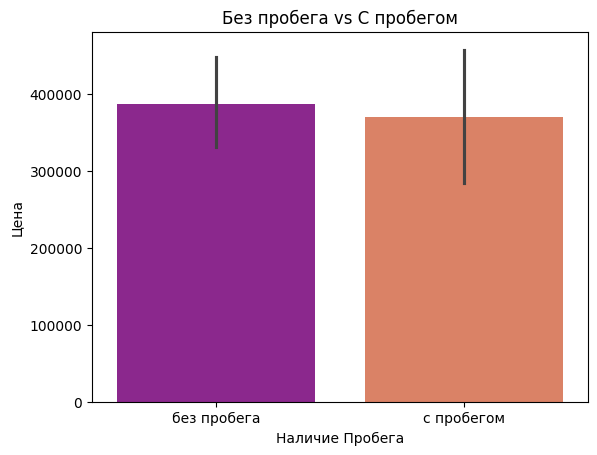

In [88]:
sns.barplot(x = 'Наличие Пробега', y ='Цена', data = data, palette ='plasma', estimator = np.std)
plt.title('Без пробега vs С пробегом');

Вывод: стоимость мотоциклов с пробегом и без не сильно отличается.

---

In [97]:
с = data[['Год', 'Цена', 'Объем двигателя (куб.см.)']].corr()

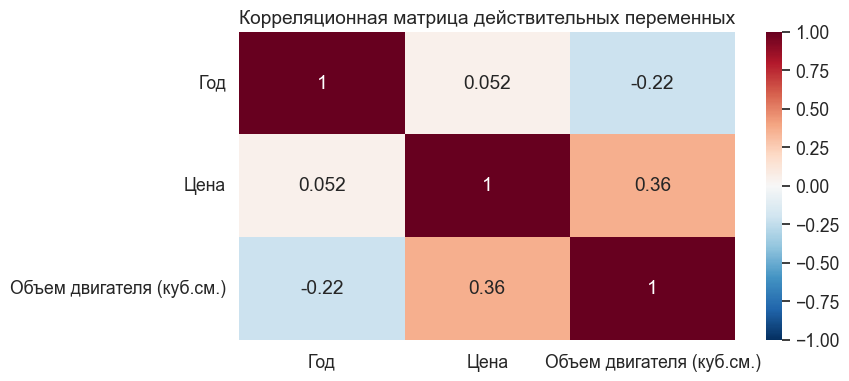

In [103]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
plt.title('Корреляционная матрица действительных переменных')
sns.heatmap(
    с,        
    cmap='RdBu_r',
    annot=True, 
    vmin=-1, vmax=1);

Вывод: существует слабая положительная связь между ценой и годом выпуска, в то же время, заметна отрицательная взаимосвязь между объёмом двигателя и годом выпуска.

---

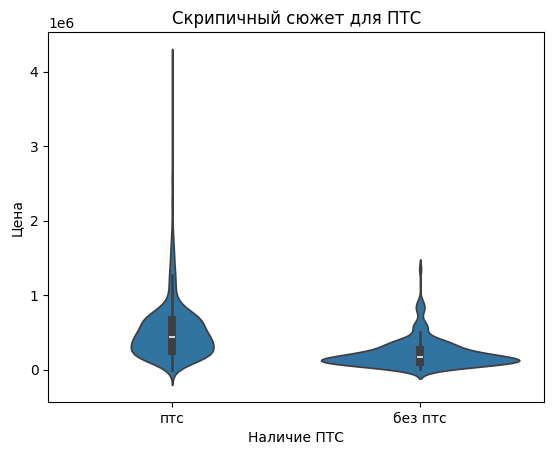

In [42]:
sns.violinplot(x='Наличие ПТС',y='Цена',data=data)
plt.title('Скрипичный сюжет для ПТС');

Вывод: мотоциклы без ПТС в плане ценообразования имеют меньше выбросов и больше сосредоточены вокруг одной цены.

---

to be continued...